<a href="https://colab.research.google.com/github/smgowtham/bits-dsad-avltree/blob/master/Gowtham_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Import required libraries and the dataset

In [0]:
import keras
import tensorflow as tf
import seaborn as sns
tf.enable_eager_execution()
from tensorflow.python.keras import regularizers
from keras.layers.core import Dropout

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

import random
import numpy as np
import pandas as pd



random.seed(21)         # Initialize the random number generator.
np.random.seed(21)      # With the seed reset, the same set of numbers will appear every time. 
tf.set_random_seed(21)  # sets the graph-level random seed

# Import mnsit handwriting dataset.
mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

# 2. Visualise a sample of dataset


Size of the datasets:
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Printing sample data:
Ytrain :  5


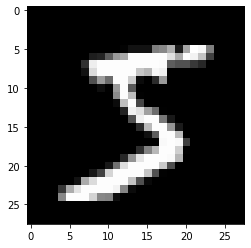

In [0]:
# size of the datsets
print("Size of the datasets:")
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)


# print a sample data
print("Printing sample data:")
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(Xtrain[0], cmap='gray')
print('Ytrain : ', Ytrain[0])


# 3. Data preprocessing


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
Ytrain:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


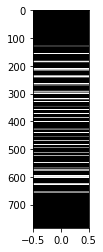

In [0]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

# print an input data

plt.imshow(Xtrain[1].reshape(28*28,1), cmap='gist_gray',aspect=0.005)
print('Ytrain: ', Ytrain[0])

# 4. Sequential Model Building with Activation for each layer

In [0]:
dnnModel = models.Sequential()

# specify the input size for in the hidden layer 1.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

#Dropout to hidden layer 1
dnnModel.add(layers.Dropout(0.25))


# output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


# 5. Compile with categorical CE loss and metric accuracy

In [0]:
# Configure  the model for training, by using appropriate optimizers 
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
from tensorflow.python.keras.optimizers import adam
opt = adam(lr=0.001) #lr of 1e-03
dnnModel.compile(optimizer = opt,
                 loss = 'categorical_crossentropy', 
                 metrics=['accuracy'] )

# 6. Train Model with cross validation, with total time taken shown for 20 epochs


In [0]:
# train the model

history = dnnModel.fit(Xtrain, Ytrain, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.6932 - acc: 0.7974
Epoch 2/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.3392 - acc: 0.9020
Epoch 3/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2831 - acc: 0.9181
Epoch 4/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2466 - acc: 0.9283
Epoch 5/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2225 - acc: 0.9352
Epoch 6/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2024 - acc: 0.9406
Epoch 7/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1899 - acc: 0.9449
Epoch 8/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1783 - acc: 0.9470
Epoch 9/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.1710 - acc: 0.9493
Epoch 10/20
60000/60000 [==============================] - 

# 7. Visualise Loss and Accuracy history

In [0]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


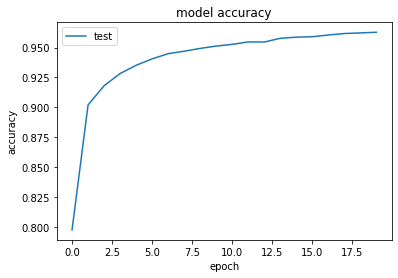

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

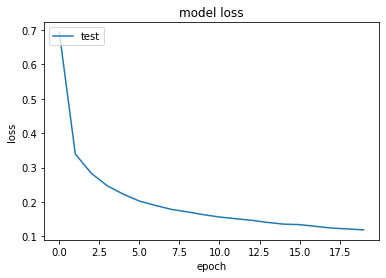

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

# 8. Show Confusion Matrix for validation dataset


(10000,)
(10000, 10)


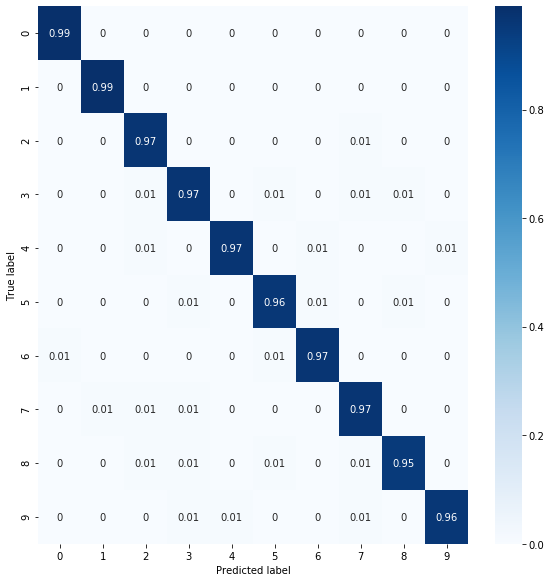

In [0]:
# Print confusion matrix
classes=[0,1,2,3,4,5,6,7,8,9]
YPred=dnnModel.predict_classes(Xtest)
print(YPred.shape)
print(Ytest.shape)
conf_mat = tf.math.confusion_matrix(labels=tf.argmax( Ytest, 1 ), predictions=YPred).numpy()

conf_mat_norm = np.around(conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
conf_mat_df = pd.DataFrame(conf_mat_norm,
                     index = classes, 
                     columns = classes)


figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()